In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.utils import shuffle
import time
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.rcParams['figure.dpi'] = 150

In [2]:
dataset = '/mnt/data/ml/ShowJetsData_full.npz'
data = np.load(dataset)
print(data.files)

['jetImages', 'jetPt', 'jetEta', 'jetPhi', 'tau21', 'chMult', 'neutMult', 'phoMult', 'eleMult', 'muMult', 'jetpull', 'labels']


In [3]:
s=time.time()
data_dic={key : data[key]  for key in data.files}
data_dic['jetImages'] = data_dic['jetImages'].reshape(len(data_dic['jetImages']),1,16,16)
data_dic['jetpull'] = np.abs(data_dic['jetpull']/np.pi)
data_dic['chMult'] = data_dic['chMult'].astype(int)
data_dic['neutMult'] = data_dic['neutMult'].astype(int)
data_dic['phoMult'] = data_dic['phoMult'].astype(int)
data_dic['eleMult'] = data_dic['eleMult'].astype(int)
data_dic['muMult'] = data_dic['muMult'].astype(int)
data_dic['labels'] = data_dic['labels'].astype(int)
print(time.time() -s )

17.13538384437561


In [4]:
numZ = np.min([np.sum(data_dic['labels'][:,1]==1), np.sum(data_dic['labels'][:,2]==1), np.sum(data_dic['labels'][:,3]==1)])
numData = np.min([numZ, np.sum(data_dic['labels'][:,0]==1)])

In [5]:
z123 = np.array(list(zip(
    (np.argwhere(data_dic['labels'][:,1]==1)[:int(numData/3)]),
    (np.argwhere(data_dic['labels'][:,2]==1)[:int(numData/3)]),
    (np.argwhere(data_dic['labels'][:,3]==1)[:math.ceil(numData/3)])))).flatten()
qcd = np.argwhere(data_dic['labels'][:,0]==1)[:numData].flatten()

In [6]:
labels = np.zeros([len(data_dic['jetImages']),2])
labels[data_dic['labels'][:,1]==1] = [0,1]
labels[data_dic['labels'][:,2]==1] = [0,1]
labels[data_dic['labels'][:,3]==1] = [0,1]
labels[data_dic['labels'][:,0]==1] = [1,0]
del data_dic['labels']
data_dic['labels'] = labels

In [7]:
split = int(0.8*numData)
train_id = np.concatenate((z123[:split],qcd[:split]),axis=0)
np.random.shuffle(train_id)
test_id = np.concatenate((z123[split:],qcd[split:]),axis=0)
np.random.shuffle(test_id)

In [8]:
train_data={}
test_data={}
for key in data_dic.keys():
    train_data[key] = data_dic[key][train_id]
    test_data[key] = data_dic[key][test_id]

In [9]:
feat = list(data_dic.keys())
feat.remove('jetImages')
feat.remove('labels')

In [10]:
train=pd.DataFrame(train_data,columns=feat)
test=pd.DataFrame(test_data,columns=feat)

In [11]:
train.corr()

,jetPt,jetEta,jetPhi,tau21,chMult,neutMult,phoMult,eleMult,muMult,jetpull
jetPt,1.000000,-0.001157,-0.000138,-0.264743,0.245742,0.083651,0.360022,0.094189,0.065383,-0.070848
jetEta,-0.001157,1.000000,-0.001058,0.001091,-0.000846,0.001282,-0.001101,-0.000869,0.001517,0.001175
jetPhi,-0.000138,-0.001058,1.000000,0.000794,-0.001069,-0.001460,-0.001184,-0.000315,0.002757,-0.000456
tau21,-0.264743,0.001091,0.000794,1.000000,-0.071574,-0.000441,-0.118469,-0.070653,-0.094093,0.220802
chMult,0.245742,-0.000846,-0.001069,-0.071574,1.000000,0.342310,0.611505,0.099205,0.059172,-0.002971
neutMult,0.083651,0.001282,-0.001460,-0.000441,0.342310,1.000000,0.249479,0.030385,0.011471,0.010317
phoMult,0.360022,-0.001101,-0.001184,-0.118469,0.611505,0.249479,1.000000,0.114685,0.044256,-0.023408
eleMult,0.094189,-0.000869,-0.000315,-0.070653,0.099205,0.030385,0.114685,1.000000,0.070615,-0.015840
muMult,0.065383,0.001517,0.002757,-0.094093,0.059172,0.011471,0.044256,0.070615,1.000000,-0.017336
jetpull,-0.070848,0.001175,-0.000456,0.220802,-0.002971,0.010317,-0.023408,-0.015840,-0.017336,1.000000


In [12]:
test.corr()

,jetPt,jetEta,jetPhi,tau21,chMult,neutMult,phoMult,eleMult,muMult,jetpull
jetPt,1.000000,0.002320,0.001524,-0.266021,0.244270,0.083443,0.359365,0.092453,0.061663,-0.069978
jetEta,0.002320,1.000000,-0.002144,-0.000536,0.001504,0.001884,0.002920,0.003454,-0.000461,0.000242
jetPhi,0.001524,-0.002144,1.000000,-0.005983,0.002176,-0.001480,0.001315,0.001692,0.001667,0.002456
tau21,-0.266021,-0.000536,-0.005983,1.000000,-0.066492,-0.001180,-0.112385,-0.071748,-0.093828,0.222648
chMult,0.244270,0.001504,0.002176,-0.066492,1.000000,0.342997,0.609987,0.097209,0.056777,-0.004062
neutMult,0.083443,0.001884,-0.001480,-0.001180,0.342997,1.000000,0.247145,0.027013,0.011553,0.010648
phoMult,0.359365,0.002920,0.001315,-0.112385,0.609987,0.247145,1.000000,0.115144,0.039708,-0.019963
eleMult,0.092453,0.003454,0.001692,-0.071748,0.097209,0.027013,0.115144,1.000000,0.070264,-0.016818
muMult,0.061663,-0.000461,0.001667,-0.093828,0.056777,0.011553,0.039708,0.070264,1.000000,-0.015245
jetpull,-0.069978,0.000242,0.002456,0.222648,-0.004062,0.010648,-0.019963,-0.016818,-0.015245,1.000000


## Plot input variables

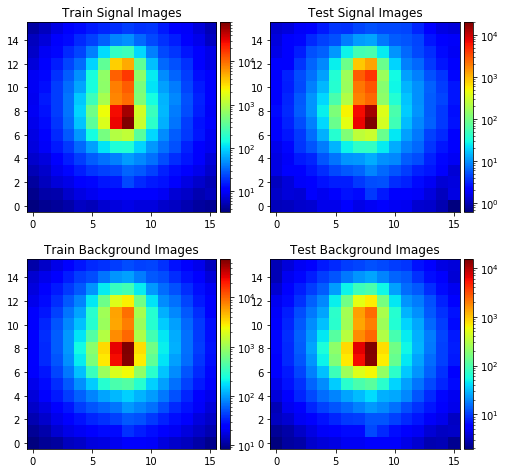

In [13]:
fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(221)
im = plt.imshow(np.sum(train_data['jetImages'][train_data['labels'][:,1]==1], axis=(0,1)),
                cmap='jet', interpolation='nearest', norm=LogNorm(), origin='low')
plt.colorbar(im,fraction=0.0467, pad=0.02)
plt.title('Train Signal Images')

ax2 = fig.add_subplot(222)
im = plt.imshow(np.sum(test_data['jetImages'][test_data['labels'][:,1]==1], axis=(0,1)),
                cmap='jet', interpolation='nearest', norm=LogNorm(), origin='low')
plt.colorbar(im,fraction=0.0467, pad=0.02)
plt.title('Test Signal Images')

ax3 = fig.add_subplot(223)
im = plt.imshow(np.sum(train_data['jetImages'][train_data['labels'][:,0]==1], axis=(0,1)),
                cmap='jet', interpolation='nearest', norm=LogNorm(), origin='low')
plt.colorbar(im,fraction=0.0467, pad=0.02)
plt.title('Train Background Images')

ax4 = fig.add_subplot(224)
im = plt.imshow(np.sum(test_data['jetImages'][test_data['labels'][:,0]==1], axis=(0,1)),
                cmap='jet', interpolation='nearest', norm=LogNorm(), origin='low')
plt.colorbar(im,fraction=0.0467, pad=0.02)
plt.title('Test Background Images')
plt.show()

## Jet pT plot

In [14]:
plt.rcParams['figure.dpi'] = 70

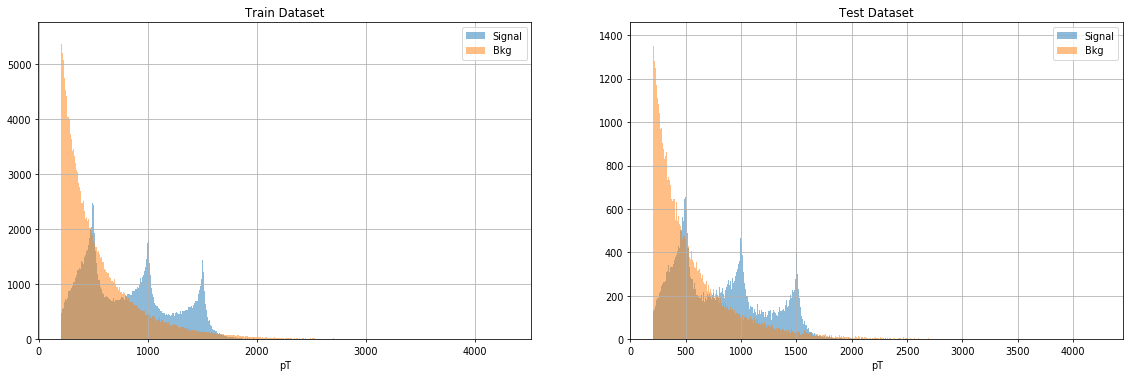

In [15]:
fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(121)
train['jetPt'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
train['jetPt'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
plt.xlabel('pT')
plt.title('Train Dataset')
plt.legend()

ax2 = fig.add_subplot(122)
test['jetPt'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
test['jetPt'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
plt.xlabel('pT')
plt.title('Test Dataset')
plt.legend()
plt.show()

## Jet eta plot

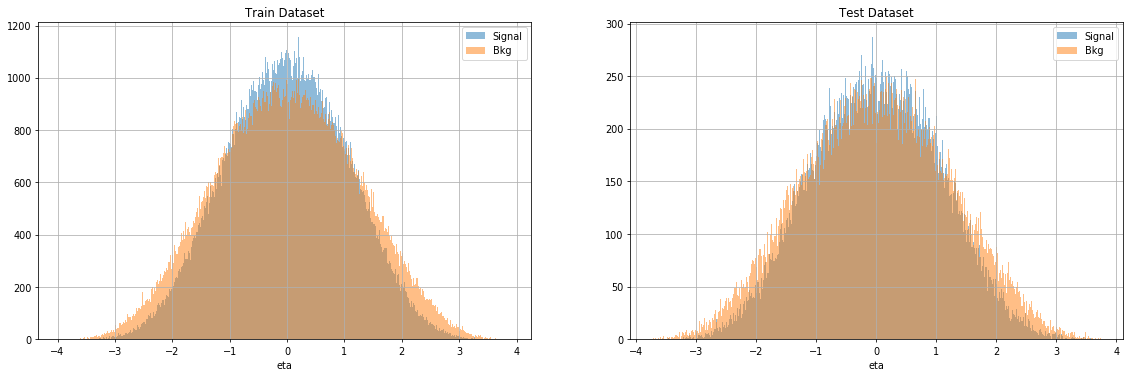

In [16]:
fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(121)
train['jetEta'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
train['jetEta'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
plt.xlabel('eta')
plt.title('Train Dataset')
plt.legend()

ax2 = fig.add_subplot(122)
test['jetEta'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
test['jetEta'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
plt.xlabel('eta')
plt.title('Test Dataset')
plt.legend()
plt.show()

## Jet phi plot

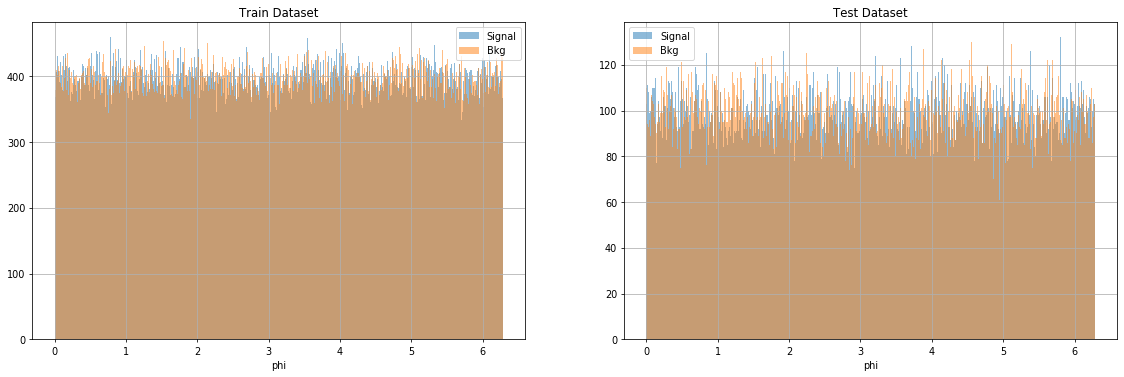

In [17]:
fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(121)
train['jetPhi'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
train['jetPhi'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
plt.xlabel('phi')
plt.title('Train Dataset')
plt.legend()

ax2 = fig.add_subplot(122)
test['jetPhi'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
test['jetPhi'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
plt.xlabel('phi')
plt.title('Test Dataset')
plt.legend()
plt.show()

## tau21 plot

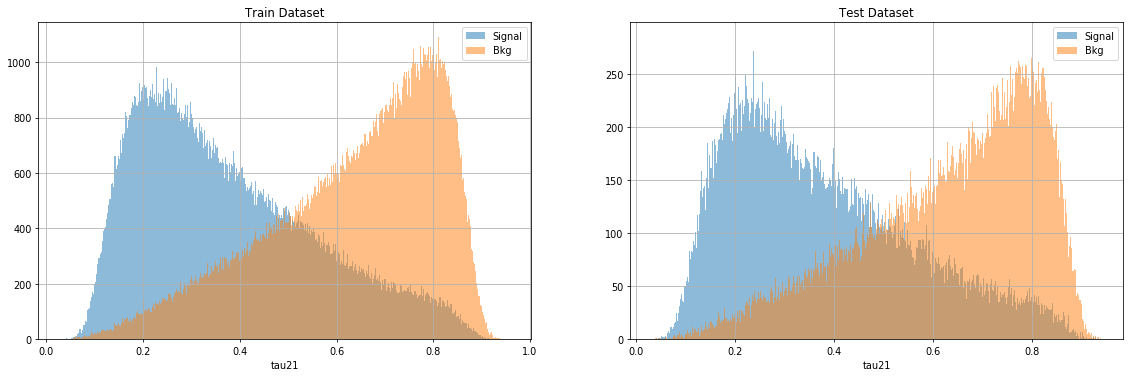

In [18]:
fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(121)
train['tau21'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
train['tau21'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
plt.xlabel('tau21')
plt.title('Train Dataset')
plt.legend()

ax2 = fig.add_subplot(122)
test['tau21'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
test['tau21'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
plt.xlabel('tau21')
plt.title('Test Dataset')
plt.legend()
plt.show()

## Plot jetpull

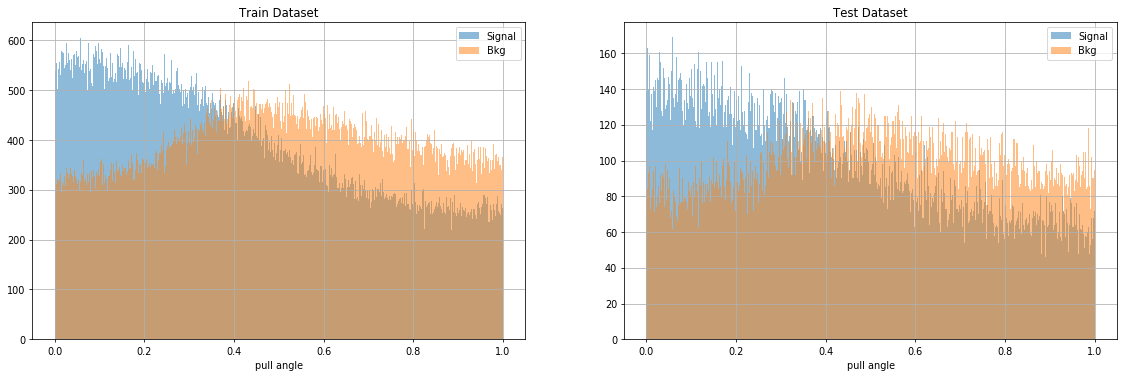

In [19]:
fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(121)
train['jetpull'][train_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
train['jetpull'][train_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
plt.xlabel('pull angle')
plt.title('Train Dataset')
plt.legend()

ax2 = fig.add_subplot(122)
test['jetpull'][test_data['labels'][:,1]==1].hist(bins=1000, alpha=0.5, label ='Signal')
test['jetpull'][test_data['labels'][:,0]==1].hist(bins=1000, alpha=0.5, label ='Bkg')
plt.xlabel('pull angle')
plt.title('Test Dataset')
plt.legend()
plt.show()

## Plot Multiplicities

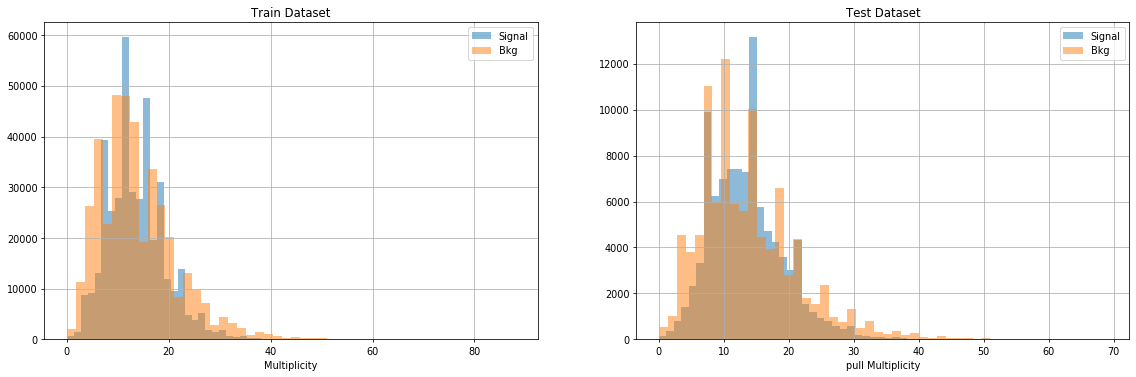

In [20]:
fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(121)
train['chMult'][train_data['labels'][:,1]==1].hist(bins=50, alpha=0.5, label ='Signal')
train['chMult'][train_data['labels'][:,0]==1].hist(bins=50, alpha=0.5, label ='Bkg')
plt.xlabel('Multiplicity')
plt.title('Train Dataset')
plt.legend()

ax2 = fig.add_subplot(122)
test['chMult'][test_data['labels'][:,1]==1].hist(bins=50, alpha=0.5, label ='Signal')
test['chMult'][test_data['labels'][:,0]==1].hist(bins=50, alpha=0.5, label ='Bkg')
plt.xlabel('pull Multiplicity')
plt.title('Test Dataset')
plt.legend()
plt.show()

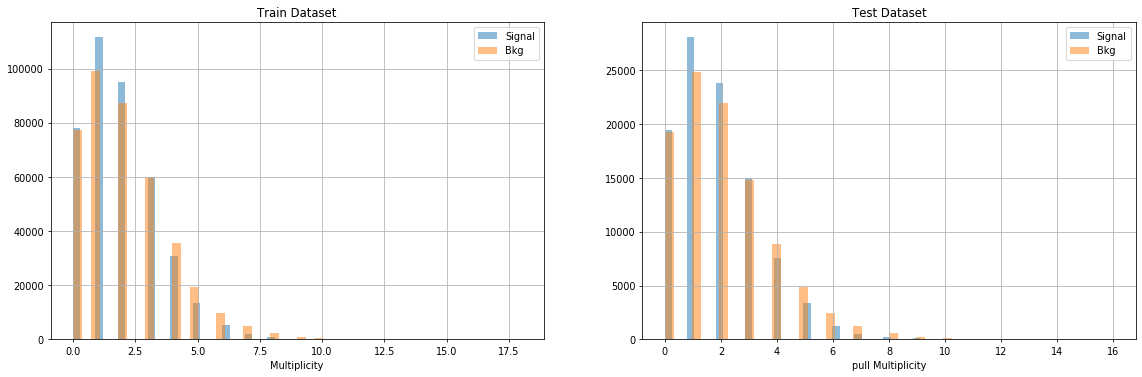

In [21]:
fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(121)
train['neutMult'][train_data['labels'][:,1]==1].hist(bins=50, alpha=0.5, label ='Signal')
train['neutMult'][train_data['labels'][:,0]==1].hist(bins=50, alpha=0.5, label ='Bkg')
plt.xlabel('Multiplicity')
plt.title('Train Dataset')
plt.legend()

ax2 = fig.add_subplot(122)
test['neutMult'][test_data['labels'][:,1]==1].hist(bins=50, alpha=0.5, label ='Signal')
test['neutMult'][test_data['labels'][:,0]==1].hist(bins=50, alpha=0.5, label ='Bkg')
plt.xlabel('pull Multiplicity')
plt.title('Test Dataset')
plt.legend()
plt.show()

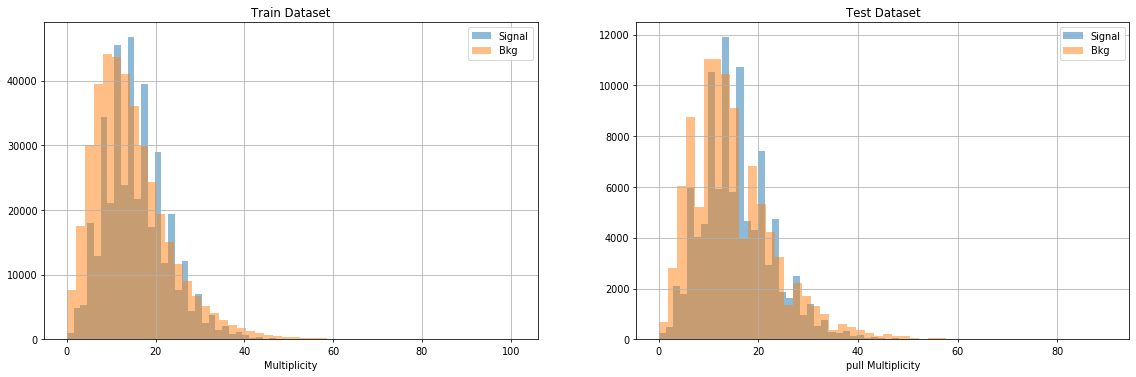

In [22]:
fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(121)
train['phoMult'][train_data['labels'][:,1]==1].hist(bins=50, alpha=0.5, label ='Signal')
train['phoMult'][train_data['labels'][:,0]==1].hist(bins=50, alpha=0.5, label ='Bkg')
plt.xlabel('Multiplicity')
plt.title('Train Dataset')
plt.legend()

ax2 = fig.add_subplot(122)
test['phoMult'][test_data['labels'][:,1]==1].hist(bins=50, alpha=0.5, label ='Signal')
test['phoMult'][test_data['labels'][:,0]==1].hist(bins=50, alpha=0.5, label ='Bkg')
plt.xlabel('pull Multiplicity')
plt.title('Test Dataset')
plt.legend()
plt.show()

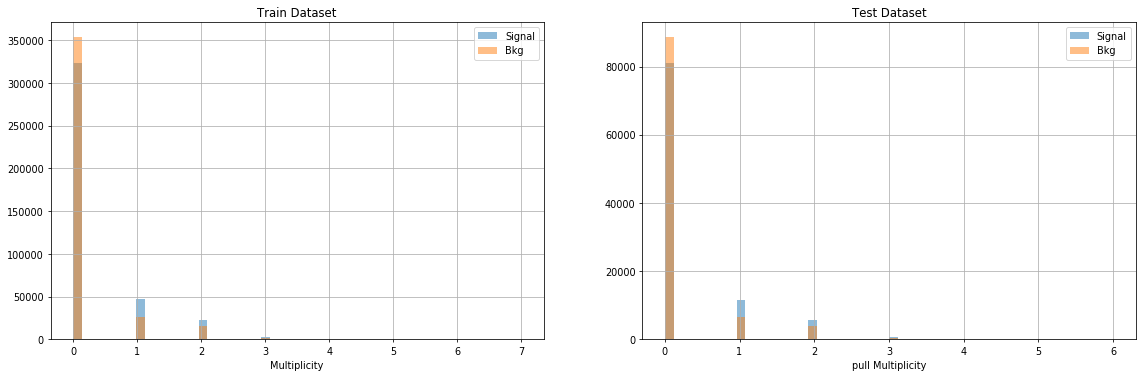

In [23]:
fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(121)
train['eleMult'][train_data['labels'][:,1]==1].hist(bins=50, alpha=0.5, label ='Signal')
train['eleMult'][train_data['labels'][:,0]==1].hist(bins=50, alpha=0.5, label ='Bkg')
plt.xlabel('Multiplicity')
plt.title('Train Dataset')
plt.legend()

ax2 = fig.add_subplot(122)
test['eleMult'][test_data['labels'][:,1]==1].hist(bins=50, alpha=0.5, label ='Signal')
test['eleMult'][test_data['labels'][:,0]==1].hist(bins=50, alpha=0.5, label ='Bkg')
plt.xlabel('pull Multiplicity')
plt.title('Test Dataset')
plt.legend()
plt.show()

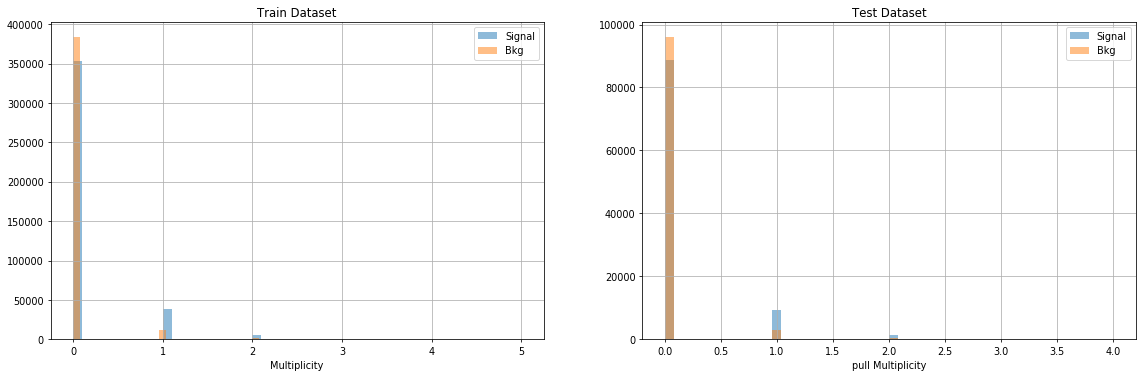

In [24]:
# chMult 	neutMult 	phoMult 	eleMult 	muMult

fig = plt.figure(figsize = (20,6))

ax1 = fig.add_subplot(121)
train['muMult'][train_data['labels'][:,1]==1].hist(bins=50, alpha=0.5, label ='Signal')
train['muMult'][train_data['labels'][:,0]==1].hist(bins=50, alpha=0.5, label ='Bkg')
plt.xlabel('Multiplicity')
plt.title('Train Dataset')
plt.legend()

ax2 = fig.add_subplot(122)
test['muMult'][test_data['labels'][:,1]==1].hist(bins=50, alpha=0.5, label ='Signal')
test['muMult'][test_data['labels'][:,0]==1].hist(bins=50, alpha=0.5, label ='Bkg')
plt.xlabel('pull Multiplicity')
plt.title('Test Dataset')
plt.legend()
plt.show()

In [27]:
np.savez('./ShowJet_full_train.npz',**train_data)
np.savez('./ShowJet_full_test.npz',**test_data)